In [6]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import html5lib
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 6

In [2]:
fconvdata = lambda data: pd.datetime.strptime(data,"%Y-%m-%d")
dados = pd.read_csv("arquivo_geral.csv", delimiter=";", parse_dates=['data'], date_parser=fconvdata)
dados.head(3)

,regiao,estado,data,casosNovos,casosAcumulados,obitosNovos,obitosAcumulados
0,Norte,RO,2020-01-30,0,0,0,0
1,Norte,RO,2020-01-31,0,0,0,0
2,Norte,RO,2020-02-01,0,0,0,0


In [3]:
df_brasil = dados[['data','obitosNovos']].groupby(['data']).sum()
df_brasil = df_brasil[31:]
df_brasil.head(3)

,obitosNovos
data,
2020-03-01,0
2020-03-02,0
2020-03-03,0


In [4]:
from pmdarima.arima import auto_arima

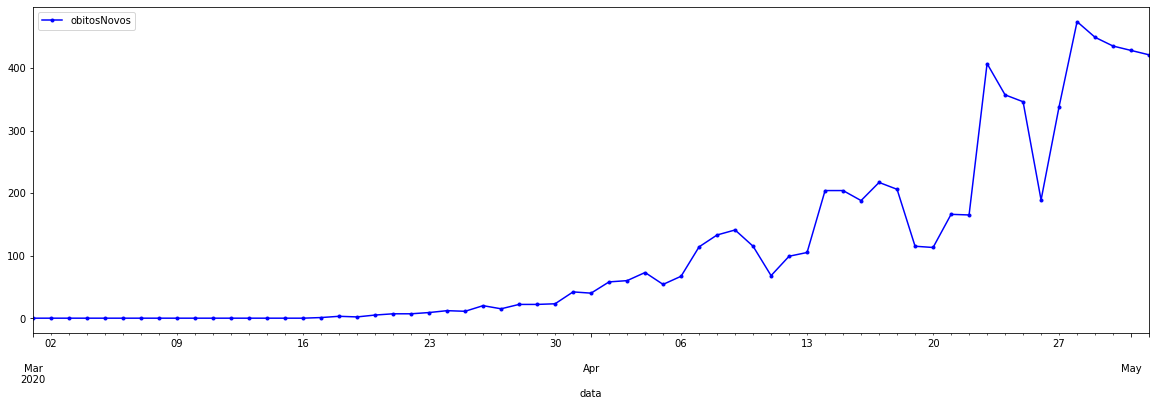

In [7]:
df_brasil.plot(marker='.', color='blue', legend=True)

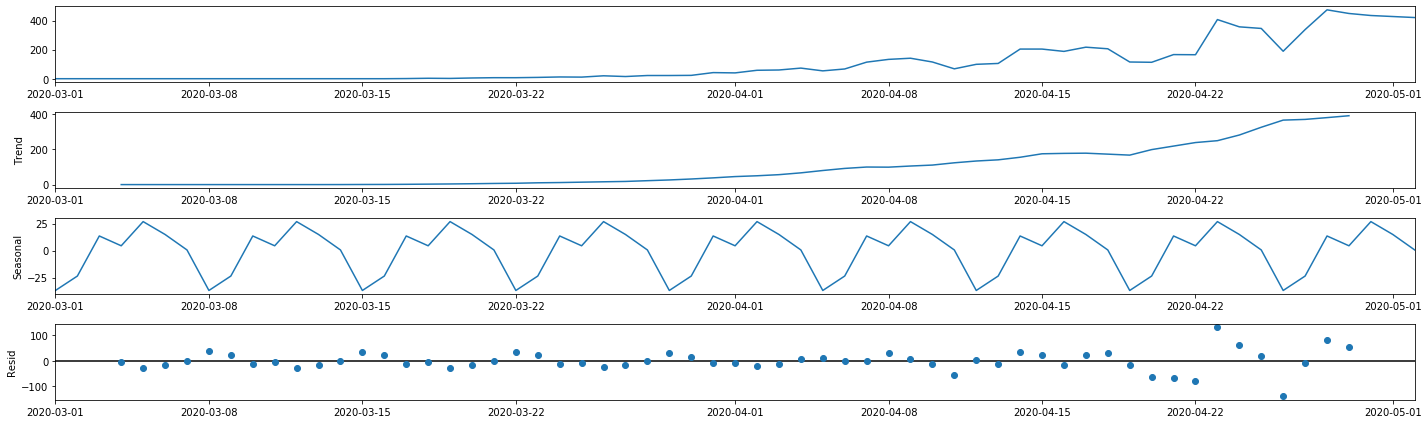

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_brasil, model="add")
result.plot()
plt.show()

In [9]:
from pmdarima.arima import auto_arima

In [10]:
bruteforce_modelo = auto_arima(df_brasil, start_p=0, start_d=0 ,start_q=0,max_p=6, max_d=0,max_q=6, m=7, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',suppress_warnings=True, stepwise=False)

Fit ARIMA(0,1,0)x(0,1,0,7) [intercept=True]; AIC=613.478, BIC=617.493, Time=0.069 seconds
Fit ARIMA(0,1,0)x(0,1,1,7) [intercept=True]; AIC=597.962, BIC=603.984, Time=0.316 seconds
Fit ARIMA(0,1,0)x(0,1,2,7) [intercept=True]; AIC=596.164, BIC=604.193, Time=0.536 seconds
Fit ARIMA(0,1,0)x(1,1,0,7) [intercept=True]; AIC=596.590, BIC=602.612, Time=0.196 seconds
Fit ARIMA(0,1,0)x(1,1,1,7) [intercept=True]; AIC=597.155, BIC=605.184, Time=0.433 seconds
Fit ARIMA(0,1,0)x(1,1,2,7) [intercept=True]; AIC=598.163, BIC=608.200, Time=1.125 seconds
Fit ARIMA(0,1,0)x(2,1,0,7) [intercept=True]; AIC=596.628, BIC=604.658, Time=0.792 seconds
Fit ARIMA(0,1,0)x(2,1,1,7) [intercept=True]; AIC=598.623, BIC=608.660, Time=2.115 seconds
Fit ARIMA(0,1,0)x(2,1,2,7) [intercept=True]; AIC=600.119, BIC=612.163, Time=1.931 seconds
Fit ARIMA(0,1,1)x(0,1,0,7) [intercept=True]; AIC=610.175, BIC=616.197, Time=0.158 seconds
Fit ARIMA(0,1,1)x(0,1,1,7) [intercept=True]; AIC=593.959, BIC=601.988, Time=0.659 seconds
Fit ARIMA(

In [11]:
print(bruteforce_modelo.aic())

582.4404083554928


In [12]:
df_brasil.head(500)

,obitosNovos
data,
2020-03-01,0
2020-03-02,0
2020-03-03,0
2020-03-04,0
2020-03-05,0
...,...
2020-04-28,474
2020-04-29,449
2020-04-30,435


In [13]:
dias_previsao = 30

In [14]:
import datetime 
dataatual = datetime.datetime.today()
lista_datas = [dataatual + datetime.timedelta(days=x) for x in range(dias_previsao)]
lista_datas = [pd.datetime.strftime(i,'%Y-%m-%d') for i in lista_datas]

In [15]:
futuro_forecast = bruteforce_modelo.predict(n_periods=dias_previsao)
futuro_forecast = pd.DataFrame(futuro_forecast,index = lista_datas,columns=["obitosNovos"])
futuro_forecast.index.name = 'data'
futuro_forecast.index = pd.to_datetime(futuro_forecast.index)
futuro_forecast.head(2)

,obitosNovos
data,
2020-05-03,326.003783
2020-05-04,372.018635


In [16]:
import plotly.express as px
final = pd.concat([df_brasil,futuro_forecast])
final.head(2)

,obitosNovos
data,
2020-03-01,0.0
2020-03-02,0.0


In [17]:
fig = px.line(final, x=final.index, y="obitosNovos", width=1300, height=600)
fig.show()